# RECURRENT NEURAL NETWORK (RNN)

* [Recurrent Neural Network (RNN)](#1)
* [Long Short Term Memory (LSTM)](#2)

## SEQUENCE MODELS

* Sequence models plays an over time. 
* Speech recognition, natural language process (NLP), music generation
* Apples Siri and Google's voice search
* Sentiment classification: For Instance: "Best movie EVER!!" or "The movie was so bad!!" 

<a id="1"></a>

## RECURRENT NEURAL NETWORK (RNN)

* They have memory. Short term memory remembers what happened on the previous node.
* It relates to the previous example. In this way, the entries are progressed without forgetting.
* RNN have Short Term Memory but LSTM can have Long Term Memory
* What makes RNN different from ANN and CNN is *memory*


## IMPLEMENTING RECURRENT NEURAL NETWORK with KERAS
* [Loading and Preprocessing Data](#3)
* [Create RNN Model](#4)
* [Predictions and Visualising RNN Model](#5)

<a id="3"></a>
## Loading and Preprocessing Data

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [14]:
data_train=pd.read_csv("Google_Stock_Price_Train.csv")
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [15]:
# Lets just use open :
train=data_train.loc[:,["Open"]].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [16]:
# Normalize the Train (0-1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_scaled=scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

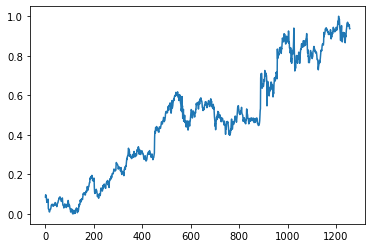

In [17]:
plt.plot(train_scaled);

In [18]:
# Creating a data structure with 50 timesteps and 1 output
X_train=[]
y_train=[]
timesteps=50
for i in range(timesteps,1258): # We have 1258 columns
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])
X_train=np.array(X_train)
y_train=np.array(y_train)
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.03675869 0.04486941 0.05065481]
 [0.09701243 0.09433366 0.09156187 ... 0.04486941 0.05065481 0.05214302]
 [0.09433366 0.09156187 0.07984225 ... 0.05065481 0.05214302 0.05612397]
 ...
 [0.9313937  0.94636878 0.96569685 ... 0.95475854 0.95204256 0.95163331]
 [0.94636878 0.96569685 0.97510976 ... 0.95204256 0.95163331 0.95725128]
 [0.96569685 0.97510976 0.95966962 ... 0.95163331 0.95725128 0.93796041]]


In [21]:
# Reshaping:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [22]:
y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146])

<a id="4"></a>

## Create RNN Model

In [32]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 250, batch_size = 32)

Epoch 1/250
38/38 [==============================] - 2s 18ms/step - loss: 0.3619
Epoch 2/250
38/38 [==============================] - 1s 19ms/step - loss: 0.2425
Epoch 3/250
38/38 [==============================] - 1s 18ms/step - loss: 0.1729
Epoch 4/250
38/38 [==============================] - 1s 18ms/step - loss: 0.1611
Epoch 5/250
38/38 [==============================] - 1s 18ms/step - loss: 0.1125
Epoch 6/250
38/38 [==============================] - 1s 18ms/step - loss: 0.0847
Epoch 7/250
38/38 [==============================] - 1s 18ms/step - loss: 0.0722
Epoch 8/250
38/38 [==============================] - 1s 18ms/step - loss: 0.0624
Epoch 9/250
38/38 [==============================] - 1s 18ms/step - loss: 0.0503
Epoch 10/250
38/38 [==============================] - 1s 18ms/step - loss: 0.0435
Epoch 11/250
38/38 [==============================] - 1s 18ms/step - loss: 0.0347
Epoch 12/250
38/38 [==============================] - 1s 18ms/step - loss: 0.0342
Epoch 13/250
38/38 [=====

38/38 [==============================] - 1s 19ms/step - loss: 0.0023
Epoch 102/250
38/38 [==============================] - 1s 18ms/step - loss: 0.0019
Epoch 103/250
38/38 [==============================] - 1s 18ms/step - loss: 0.0018
Epoch 104/250
38/38 [==============================] - 1s 18ms/step - loss: 0.0018
Epoch 105/250
38/38 [==============================] - 1s 18ms/step - loss: 0.0017
Epoch 106/250
38/38 [==============================] - 1s 18ms/step - loss: 0.0017
Epoch 107/250
38/38 [==============================] - 1s 20ms/step - loss: 0.0018
Epoch 108/250
38/38 [==============================] - 1s 19ms/step - loss: 0.0019
Epoch 109/250
38/38 [==============================] - 1s 20ms/step - loss: 0.0018
Epoch 110/250
38/38 [==============================] - 1s 21ms/step - loss: 0.0016
Epoch 111/250
38/38 [==============================] - 1s 27ms/step - loss: 0.0017
Epoch 112/250
38/38 [==============================] - 1s 32ms/step - loss: 0.0016
Epoch 113/250
38/3

<a id="5"></a>

## Predictions and Visualising RNN Model

In [33]:
# Getting the Real Stock price of 2017:
data_test=pd.read_csv("Google_Stock_Price_Test.csv")
data_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [34]:
real_stock_price=data_test.loc[:,["Open"]].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [35]:
# Getting Predicted stock price of 2017
data_total=pd.concat((data_train["Open"],data_test["Open"]),axis=0)
inputs=data_total[len(data_total)-len(data_test)-timesteps:].values.reshape(-1,1)
inputs=scaler.transform(inputs)
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

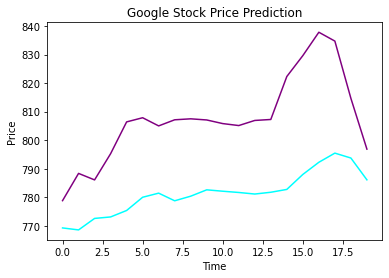

In [36]:
X_test=[]

for i in range(timesteps,70):
    X_test.append(inputs[i-timesteps:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

# VISUALISING RESULTS:

plt.plot(real_stock_price,color="purple",label="Real Google Stock Price")
plt.plot(predicted_stock_price,color="cyan",label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price");

<a id="2"></a>
# LONG SHORT TERM MEMORY (LSTMs)

* LSTM is variant of RNN.
* Unlike RNN, LSTM have Long Term Memory

* LSTM architecture:
    * x: scaling of information
    * +: Adding information
    * Sigmoid Layer: Sigmoid Layer used to remember or forget somethig from memory. It is 0 or 1.

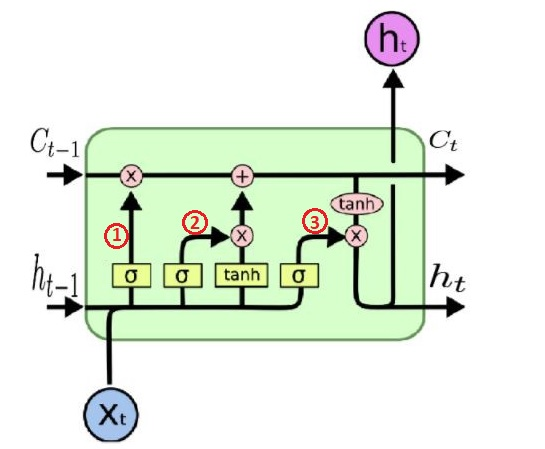

* 1) Forget Gate: It take X(t) and h(t-1) as an input. It decides whether the incoming information will be forgotten or not.
* 2) Input Gate: It decides which information will be stored in memory or not.
* 3) Output Gate: It decides which information will be output or not.
* For Instance: 
    * ... "Boys are watching TV"
    * "On the other hand girls are playing baseball."
    * Forget "boys". new input is "girls" and output is "girls"

## IMPLEMENTING LONG SHORT TERM MEMORY with KERAS

* [Loading and Visualizing Data](#6)
* [Preprocessing Data](#7)
* [Create LSTM Model](#8)
* [Predictions and Visualising LSTM Model](#9)

<a id="6"></a>
## Loading and Visualizing Data

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [81]:
data=pd.read_csv("international-airline-passengers.csv",skipfooter=5)
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


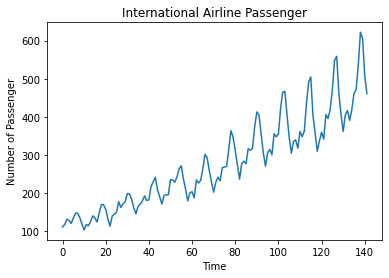

In [82]:
dataset=data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("Time")
plt.ylabel("Number of Passenger")
plt.title("International Airline Passenger");

<a id="7"></a>
## Preprocessing Data

* Reshape
* Change Type
* Scaling
* Train-Test Split
* Create Dataset

In [83]:
# RESHAPE & CHANGE TYPE
dataset=dataset.reshape(-1,1)
dataset=dataset.astype("float32")
dataset.shape

(142, 1)

In [84]:
# SCALING
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)

In [85]:
# TRAIN - TEST SPLIT

train_size=int(len(dataset)*0.50)
test_size=len(dataset)-train_size
train=dataset[0:train_size,:]
test=dataset[train_size:len(dataset),:]
print("Train size : {}, Test size : {} ".format(len(train),len(test)))

Train size : 71, Test size : 71 


In [86]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)  

In [87]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY)  

In [88]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

<a id="8"></a>
## Create LSTM Model

In [89]:
model=Sequential()

model.add(LSTM(10,input_shape=(1,time_stemp))) # 10 LSTM Neuron
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.fit(trainX,trainY,epochs=50,batch_size=1)

Epoch 1/50
60/60 [==============================] - 1s 943us/step - loss: 0.0177
Epoch 2/50
60/60 [==============================] - 0s 919us/step - loss: 0.0041
Epoch 3/50
60/60 [==============================] - 0s 838us/step - loss: 0.0036
Epoch 4/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 5/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 6/50
60/60 [==============================] - 0s 957us/step - loss: 0.0030
Epoch 7/50
60/60 [==============================] - 0s 964us/step - loss: 0.0028
Epoch 8/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 9/50
60/60 [==============================] - 0s 950us/step - loss: 0.0027
Epoch 10/50
60/60 [==============================] - 0s 934us/step - loss: 0.0025
Epoch 11/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 12/50
60/60 [==============================] - 0s 903us/step - loss: 0.0024
Epoch 13/50
60/60 [==============

<a id="9"></a>
## Predictions and Visualising LSTM Model

In [90]:
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

# INVERT PREDICTIONS:
trainPredict=scaler.inverse_transform(trainPredict)
trainY=scaler.inverse_transform([trainY])
testPredict=scaler.inverse_transform(testPredict)
testY=scaler.inverse_transform([testY])

# CALCULATE ROOT MEAN SQUARED ERROR:

trainScore=math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print("Train Score: %.2f RMSE " % (trainScore))

testScore=math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print("Test Score: %.2f RMSE " % (testScore))


Train Score: 17.23 RMSE 
Test Score: 33.11 RMSE 


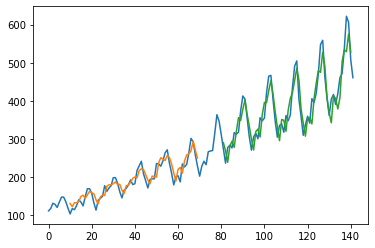

In [92]:
# SHIFTING TRAIN
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict

# SHIFTING TEST PREDICTIONS for PLOTTING
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict

# PLOT BASELINE and PREDICTIONS
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()